In [2]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv("t-test results_POS.csv",index_col=0)
df.head()

,FC,logFC,adj.P.Val,minus-logP
sample_id,,,,
100.1120075,0.992729,-0.010528,0.912699,0.039672
102.0913263,1.016910,0.024192,0.806489,0.093401
104.0706075,1.024762,0.035289,0.698135,0.156061
104.10694,1.063185,0.088392,0.455319,0.341685
110.0600525,1.002838,0.004088,0.957152,0.019019


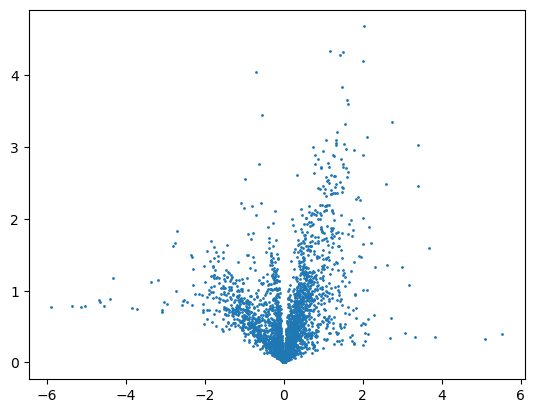

In [4]:
plt.scatter(x=df['logFC'],y=df['adj.P.Val'].apply(lambda x:-np.log10(x)),s=1)

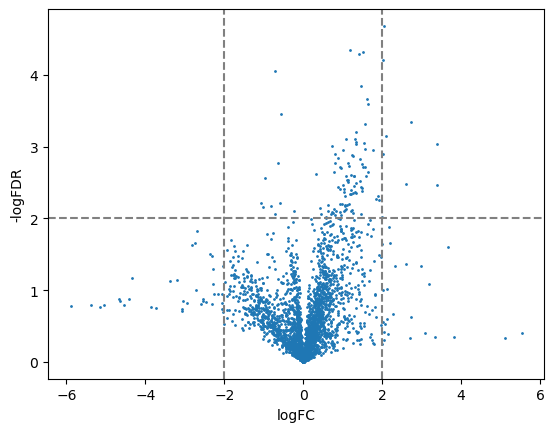

In [5]:
plt.scatter(x=df['logFC'],y=df['adj.P.Val'].apply(lambda x:-np.log10(x)),s=1)
plt.xlabel("logFC")
plt.ylabel("-logFDR")
plt.axvline(-2,color="grey",linestyle="--")
plt.axvline(2,color="grey",linestyle="--")
plt.axhline(2,color="grey",linestyle="--")

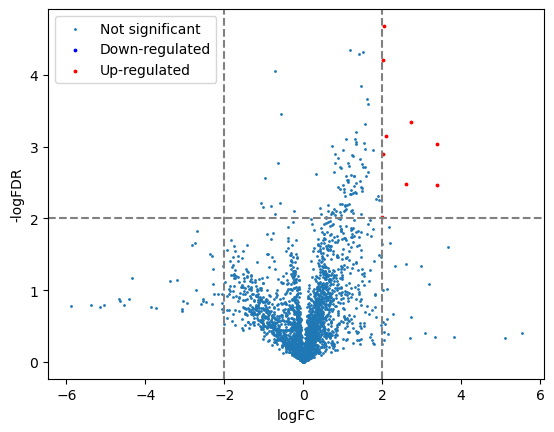

In [6]:
plt.scatter(x=df['logFC'],y=df['adj.P.Val'].apply(lambda x:-np.log10(x)),s=1,label="Not significant")

# highlight down- or up- regulated genes
down = df[(df['logFC']<=-2)&(df['adj.P.Val']<=0.01)]
up = df[(df['logFC']>=2)&(df['adj.P.Val']<=0.01)]

plt.scatter(x=down['logFC'],y=down['adj.P.Val'].apply(lambda x:-np.log10(x)),s=3,label="Down-regulated",color="blue")
plt.scatter(x=up['logFC'],y=up['adj.P.Val'].apply(lambda x:-np.log10(x)),s=3,label="Up-regulated",color="red")

plt.xlabel("logFC")
plt.ylabel("-logFDR")
plt.axvline(-2,color="grey",linestyle="--")
plt.axvline(2,color="grey",linestyle="--")
plt.axhline(2,color="grey",linestyle="--")
plt.legend()

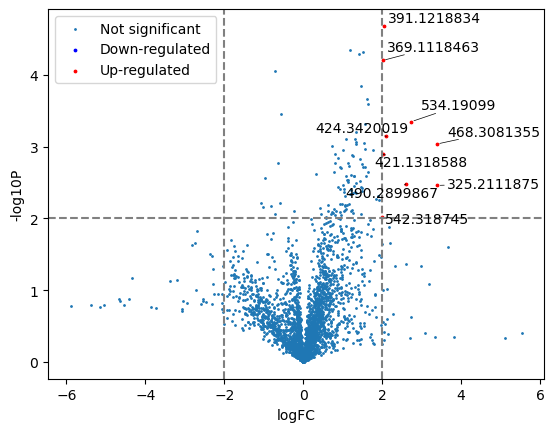

In [7]:
from adjustText import adjust_text

plt.scatter(x=df['logFC'],y=df['adj.P.Val'].apply(lambda x:-np.log10(x)),s=1,label="Not significant")

# highlight down- or up- regulated genes
down = df[(df['logFC']<=-2)&(df['adj.P.Val']<=0.01)]
up = df[(df['logFC']>=2)&(df['adj.P.Val']<=0.01)]

plt.scatter(x=down['logFC'],y=down['adj.P.Val'].apply(lambda x:-np.log10(x)),s=3,label="Down-regulated",color="blue")
plt.scatter(x=up['logFC'],y=up['adj.P.Val'].apply(lambda x:-np.log10(x)),s=3, label="Up-regulated", color="red")
texts=[]
for i,r in up.iterrows():
    texts.append(plt.text(x=r['logFC'],y=-np.log10(r['adj.P.Val']),s=i))
adjust_text(texts,arrowprops=dict(arrowstyle="-", color='black', lw=0.5))
plt.xlabel("logFC")
plt.ylabel("-log10P")
plt.axvline(-2,color="grey",linestyle="--")
plt.axvline(2,color="grey",linestyle="--")
plt.axhline(2,color="grey",linestyle="--")
plt.legend()

plt.savefig('NEG_VolcanoPlt.png')